In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

RDKit WARNING: [20:40:54] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
# load your own set, and DrugBank :)
with open('../bojicm/compound/chembl395.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        # get the standardized pChEMBL activity measure for future use
        pchembl = m['pChEMBL Value']
        if not pchembl:
            # some don't have any comparable pChEMBL value, just assign them very low value
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl)) # save the value into mol instance
        mtor_ligands.append(mol)

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [20:41:49] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:41:49] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [20:41:49] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [20:41:49] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [20:41:49] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:41:49] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:41:49] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [20:41:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:41:49] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [20:41:49] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [20:41:49] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [20:41:49] Can't kek

RDKit ERROR: [20:41:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [20:41:49] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [20:41:49] ERROR: Could not sanitize molecule ending on line 616025
RDKit ERROR: [20:41:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [20:41:49] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:41:49] ERROR: Could not sanitize molecule ending on line 623202
RDKit ERROR: [20:41:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:41:49] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [20:41:49] ERROR: Could not sanitize molecule ending on line 628065
RDKit ERROR: [20:41:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [20:41:49] Explicit val

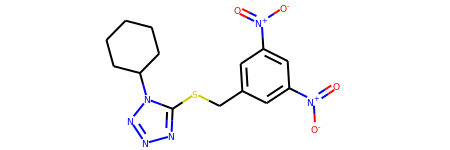

In [3]:
mtor_ligands[0]

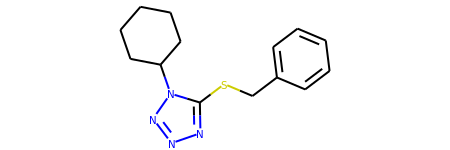

In [4]:
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffold1 = MurckoScaffold.GetScaffoldForMol(mtor_ligands[0])
scaffold1

This has removed the sidechains, but all the heteroatoms still remain. The oxygens on the sulphur were not cut either. Let's normalize all atoms into carbon, all bonds into single:

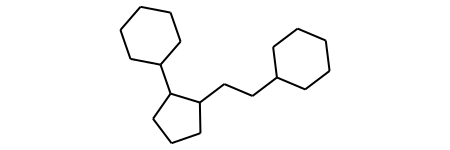

In [5]:
scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold2

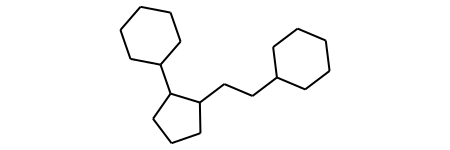

In [6]:
scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
scaffold3

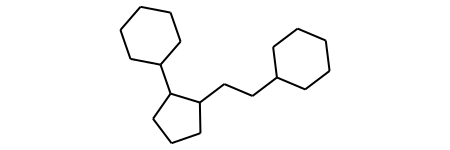

In [7]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff
scaffold(mtor_ligands[0])

In [8]:
drugbank_scaffolds = [scaffold(drug) for drug in drugs]
drugbank_scaffolds[:20]

RDKit ERROR: [20:41:50] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [20:44:20] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [20:44:20] Explicit valence for atom # 62 C, 6, is greater than permitted
RDKit ERROR: [20:44:20] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [20:44:20] Explicit valence for atom # 31 C, 6, is greater than permitted
RDKit ERROR: [20:44:20] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [20:44:21] Explicit valence for atom # 23 C greater than permitted
RDKit ERROR: [20:44:21] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [20:44:21] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [20:44:21] Explicit valence for atom # 40 C, 6, is greater than permitted
RDKit ERROR: [20:44:21] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [20:44:21] Explicit valence for atom # 31

 None,

In [9]:
drugbank_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drugbank_scaffolds) if mol]
drugbank_scaffolds_smiles[:20]

[(0,
  'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1'),
 (1,
  'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1'),
 (2, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (3,
  'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1'),
 (4, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'),
 (5, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (6, 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1'),
 (7, 'C1CCCCC1'),
 (9, 'C1CCC(CCC2CCC3CCCCC3C2)CC1'),
 (10, 'C1CCCC1'),
 (11, 'C1CCC2C(C1)CCC2C1CCCC1'),
 (12, ''),
 (13, 'C1CCCCC1'),
 (14, 'C1CC2CCCC2C1'),
 (15, ''),
 (16, ''),
 (17, ''),
 (18, 'C1CCCC1'),
 (19, ''),
 (20, '')]

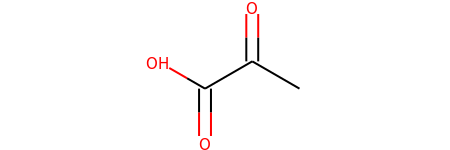

In [10]:
drugs[12]

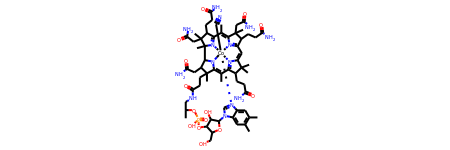

In [11]:
drugs[8]

In [12]:
scaffolds2drugs = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles}
for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles:
    scaffolds2drugs[scaffoldsmiles].append(drug_idx)
scaffolds2drugs

{'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1': [0,
  2059],
 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1': [1,
  529],
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1': [2, 5, 2324],
 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1': [3,
  4676],
 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1': [4],
 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1': [6],
 'C1CCCCC1': [7,
  13,
  27,
  39,
  54,
  56,
  59,
  67,
  72,
  73,
  78,
  81,
  82,
  89,
  102,
  108,
  112,
  123,
  126,
  127,
  131,
  134,
  149,
  154,
  155,
  161,
  171,
  181,
  192,
  196,
  198,
  202,
  206,
  224,
  228,
  234,
  257,
  258,
  268,
  276,
  285,
  305,
  306,
  310,
  315,
  318,
  333,
  336,
  346,
  350,
  361,
  370,
  375,
  376,
  378,
  381,
  386,
  408,
  416,
  429,
  430,
  435,
  443,
  459,
  477,
  479,
  484,
  494,
  495,
  497,
  512,
  514,

In [13]:
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]
len(scaffold_drugcount), scaffold_drugcount[:20]

(1545,
 [('C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1',
   2),
  ('C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1', 3),
  ('C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1', 1),
  ('C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1', 1),
  ('C1CCCCC1', 1039),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
  ('C1CCCC1', 188),
  ('C1CCC2C(C1)CCC2C1CCCC1', 165),
  ('', 976),
  ('C1CC2CCCC2C1', 15),
  ('C1CCC(CCC2CCCC3CCCC32)CC1', 28),
  ('C(CCCCCCCCCC1CCCCC1)CCCCCCCCC1CCCCC1', 2),
  ('C1CCC2CC3CCCCC3CC2C1', 57),
  ('C1CCC2CCCC2C1', 192),
  ('C1CCC(CC2CCCC2)CC1', 74),
  ('C(CCCC1CCC(C2CCCCC2)C1)CCCC1CCC(C2CCC3CCCCC32)C1', 17),
  ('C1CCC2CCCCC2C1', 169),
  ('C1CCC(C2CCCCC2C2CCCC2)CC1', 1)])

In [14]:
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)
scaffold_drugcount[:20]

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 169),
 ('C1CCC2C(C1)CCC2C1CCCC1', 165),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106),
 ('C1CCC(C2CCCCC2)CC1', 105),
 ('C1CCC(CC2CCCC2)CC1', 74),
 ('C1CCC(CCCC2CCCCC2)CC1', 66),
 ('C1CCC2CC3CCCCC3CC2C1', 57),
 ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
 ('C1CCC(CCCCC2CCCCC2)CC1', 53),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 48),
 ('C1CCC(CCC2CCCC2)CC1', 43),
 ('C1CCC(C2CCC3CCCCC3C2)CC1', 41),
 ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 34)]

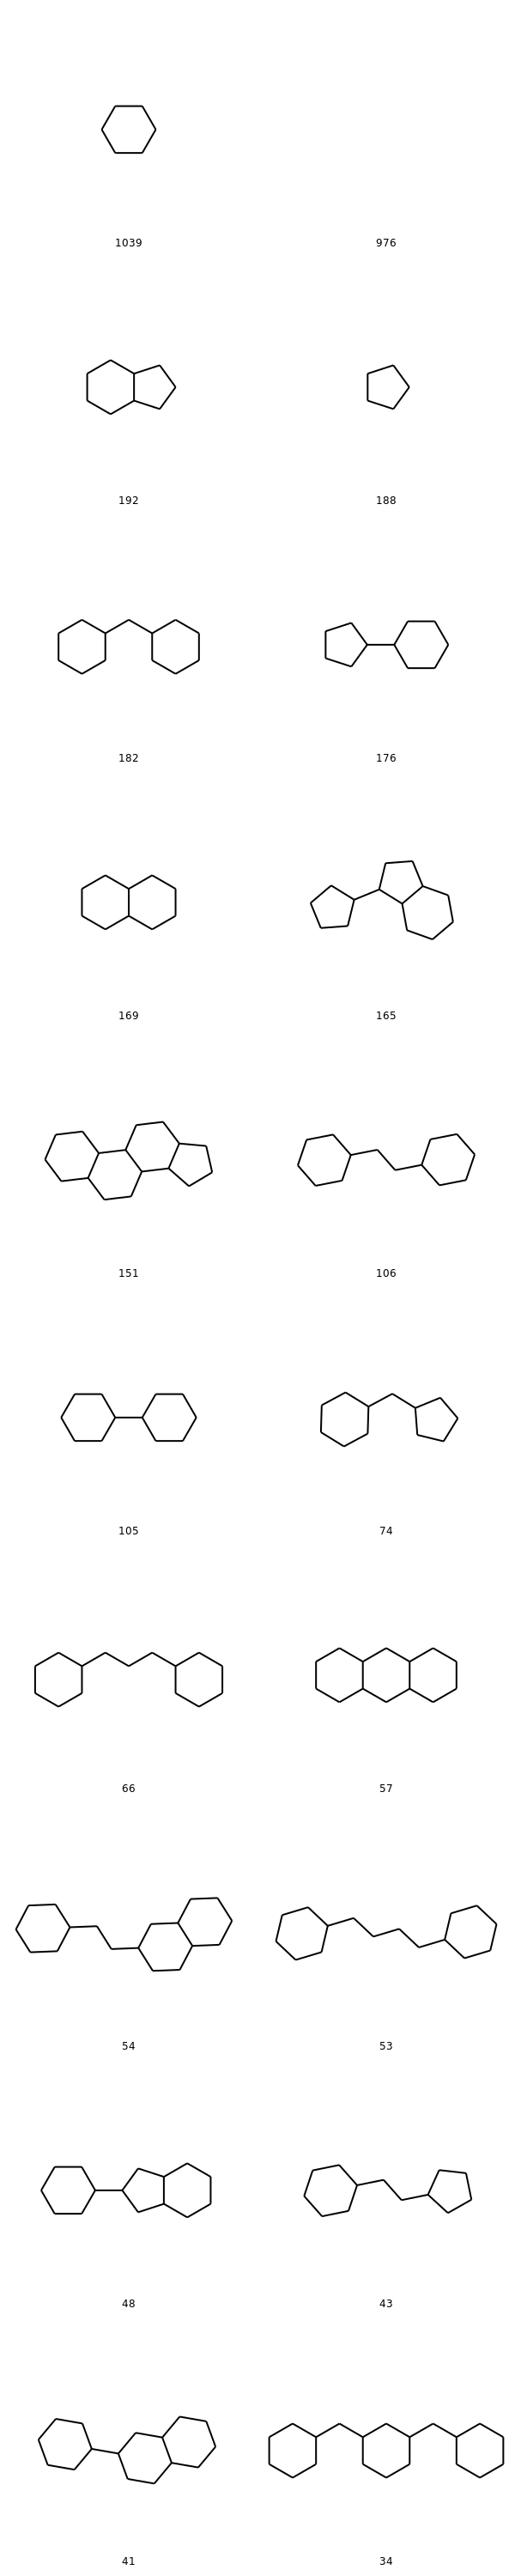

In [15]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_drugcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_drugcount[:20]])

In [16]:
mtor_scaffolds_smiles = [(i, Chem.MolToSmiles(scaffold(ligand))) for i, ligand in enumerate(mtor_ligands)]
mtor_scaffolds_smiles[:20]

[(0, 'C1CCC(CCC2CCCC2C2CCCCC2)CC1'),
 (1, 'C1CCC(CCC2CCCC2C2CCCCC2)CC1'),
 (2, 'C1CCC2C(C1)CCC1C2CCC2C3CCCCC3CCC21'),
 (3, 'C1CCC(C2CC(C3CCCCC3)CC(C3CCCCC3)C2)CC1'),
 (4, 'C1CCC(CC2CCC(C3CC4C5CCC(C5)C4C3)CC2)CC1'),
 (5, 'C1CCC2CC3C(CC2C1)CC1CC2C(CCC4CCCCC42)CC13'),
 (6, 'C1CCC(CCC(CC2CCCCC2)CC2CCC3CCCCC3C2)CC1'),
 (7, 'C1CCC(CCCC2CCC(CC3C4CCCCC4C4CCCCC43)C2)CC1'),
 (8, 'C(CCCC1CCC2C(CCC3C2CCC2C4CCCCC4CCC23)C1)CCC1CC2CCCCC2C1'),
 (9, 'C1CCC(CC2CCC(CC3CC4CCCCC4C(C4CCCC4)C3)CC2)CC1'),
 (10, 'C1CCC2C(C1)CC(CC1CCC(CCC3CC3)CC1)CC2C1CCCC1'),
 (11, 'C1CCC2C(C1)CCC1C2CCC2C3CCCCC3CCC21'),
 (12, 'C(CCCCC1CC2CCCC3CCC4CCC32C(C4)C1)CCCC1CCCC1'),
 (13, 'C1CCC(CCC2CCC(C3CCCCC3)C2)CC1'),
 (14, 'C1CCC(C2CCC3CCCCC32)CC1'),
 (15, 'C1CCC(C2CCC3CCCCC32)CC1'),
 (16, 'C1CCC(CCCCC2CCC3C(CC4CCCCC4)CCCC3C2)CC1'),
 (17, 'C1CCC2C(C1)CC1CCCC3CCCC2C31'),
 (18, 'C1CCC2CCCC2C1'),
 (19, 'C1CCC(C2CCCC2)CC1')]

In [17]:
scaffolds2ligands = {scaffoldsmiles:[] for ligand_idx, scaffoldsmiles in mtor_scaffolds_smiles}
for ligand_idx, scaffoldsmiles in mtor_scaffolds_smiles:
    scaffolds2ligands[scaffoldsmiles].append(ligand_idx)
scaffolds2ligands

{'C1CCC(CCC2CCCC2C2CCCCC2)CC1': [0,
  1,
  77,
  472,
  479,
  2443,
  2820,
  3800,
  3811,
  5974,
  7584,
  7877,
  8928,
  9739,
  10326,
  10631,
  10636,
  12058,
  12064,
  13116,
  14875,
  15328,
  16500,
  17240,
  17241,
  17249,
  18055,
  18068,
  18117,
  18162,
  18174,
  18322,
  19605],
 'C1CCC2C(C1)CCC1C2CCC2C3CCCCC3CCC21': [2,
  11,
  45,
  60,
  78,
  180,
  387,
  414,
  527,
  538,
  632,
  727,
  853,
  946,
  1241,
  1262,
  1523,
  1788,
  1789,
  1790,
  1833,
  2431,
  2432,
  2494,
  2533,
  2784,
  2945,
  3115,
  3162,
  3350,
  3471,
  4061,
  4083,
  4201,
  4203,
  4204,
  4205,
  4295,
  4619,
  4736,
  4793,
  4809,
  4819,
  5104,
  5106,
  5150,
  5475,
  5505,
  5572,
  6093,
  6186,
  6344,
  6479,
  6578,
  6590,
  6658,
  6659,
  6661,
  6763,
  6764,
  7035,
  7549,
  7557,
  7566,
  7580,
  7807,
  7810,
  7896,
  7914,
  7961,
  8397,
  8483,
  8857,
  8881,
  8926,
  8962,
  8988,
  9014,
  9034,
  9035,
  9056,
  9174,
  9276,
  9292,
  929

In [18]:
scaffold_ligandcount = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds2ligands.items()]
scaffold_ligandcount.sort(key=lambda x: x[1], reverse=True)
len(scaffold_ligandcount), scaffold_ligandcount

(3499,
 [('C1CCCCC1', 528),
  ('C1CCC2CC3CCCCC3CC2C1', 365),
  ('C1CCC(CCC2CCCCC2)CC1', 304),
  ('C1CCC(C2CCC3CCCCC3C2)CC1', 280),
  ('C1CCC(CC2CCCC3CC4CC5CCCCC5CC4CC23)CC1', 273),
  ('C1CCC2CCCCC2C1', 271),
  ('C1CCC(CC2CCCC3CCCCC32)CC1', 261),
  ('C1CCC(CCC2CCC(C3CCCCC3)C2)CC1', 221),
  ('C1CCC(CCCC2CCCCC2)CC1', 210),
  ('C1CCC2C(C1)CCC1C2CCC2C3CCCCC3CCC21', 199),
  ('C1CCC2CCCC2C1', 132),
  ('C1CCC(C2CCCC2)CC1', 130),
  ('C1CCC(C2CCCCC2)CC1', 118),
  ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 115),
  ('C1CCC(C2CCCC2C2CCCCC2)CC1', 108),
  ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 108),
  ('C1CCC(CCCC2CCCC3CCCCC32)CC1', 107),
  ('C1CCC2CC3C(CC2C1)CC1CC2CCCCC2CC13', 98),
  ('C1CCC2C(C1)CC1CCCCC12', 96),
  ('C1CCC(C2CCCC(CCC3CCC(CC4CCCC5CCCC54)CC3)C2)CC1', 95),
  ('C1CCC(CC2CCCC2)CC1', 94),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 91),
  ('C1CCC(CC2CCCCC2)CC1', 90),
  ('C1CCC(CCCCC2CCC3CCCCC23)CC1', 86),
  ('C1CCC(CCCCC2CCCCC2)CC1', 83),
  ('C1CCC(CCCC2CCC(C3CCCCC3)C2)CC1', 81),
  ('C1CCCC1', 79),
  ('C1CCC(CCCC

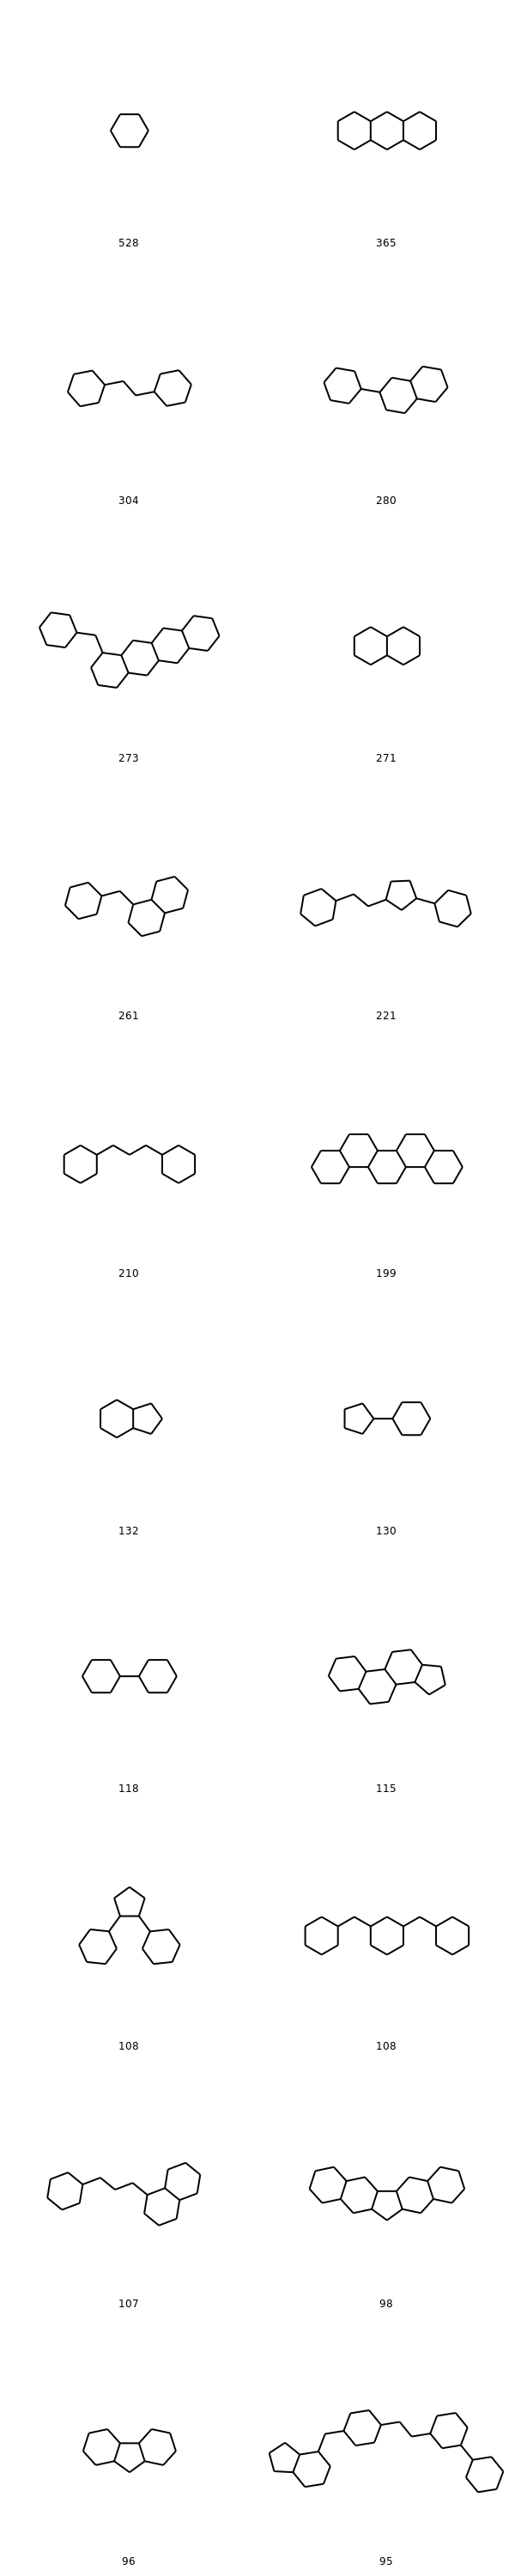

In [19]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_ligandcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_ligandcount[:20]])

Also more complex, hexacyclic structures with cojoined rings (Anthracene like).

In [22]:
scaffold_representatives = {}
for scaffold, ligands in scaffolds2ligands.items():
    scaffold_representatives[scaffold] = sorted(ligands,
                                                key=lambda x: mtor_ligands[x].GetProp('pChEMBL'),
                                                reverse=True)[0]
len(scaffold_representatives), scaffold_representatives

(3499,
 {'C1CCC(CCC2CCCC2C2CCCCC2)CC1': 17249,
  'C1CCC2C(C1)CCC1C2CCC2C3CCCCC3CCC21': 4736,
  'C1CCC(C2CC(C3CCCCC3)CC(C3CCCCC3)C2)CC1': 3,
  'C1CCC(CC2CCC(C3CC4C5CCC(C5)C4C3)CC2)CC1': 4,
  'C1CCC2CC3C(CC2C1)CC1CC2C(CCC4CCCCC42)CC13': 10698,
  'C1CCC(CCC(CC2CCCCC2)CC2CCC3CCCCC3C2)CC1': 6991,
  'C1CCC(CCCC2CCC(CC3C4CCCCC4C4CCCCC43)C2)CC1': 1989,
  'C(CCCC1CCC2C(CCC3C2CCC2C4CCCCC4CCC23)C1)CCC1CC2CCCCC2C1': 7418,
  'C1CCC(CC2CCC(CC3CC4CCCCC4C(C4CCCC4)C3)CC2)CC1': 5315,
  'C1CCC2C(C1)CC(CC1CCC(CCC3CC3)CC1)CC2C1CCCC1': 10,
  'C(CCCCC1CC2CCCC3CCC4CCC32C(C4)C1)CCCC1CCCC1': 16877,
  'C1CCC(CCC2CCC(C3CCCCC3)C2)CC1': 15575,
  'C1CCC(C2CCC3CCCCC32)CC1': 7390,
  'C1CCC(CCCCC2CCC3C(CC4CCCCC4)CCCC3C2)CC1': 7637,
  'C1CCC2C(C1)CC1CCCC3CCCC2C31': 688,
  'C1CCC2CCCC2C1': 14955,
  'C1CCC(C2CCCC2)CC1': 4734,
  'C1CCC(CC2CCCC2CCCCCCC2CCC3CCC4C(CCC5C6CCCCC6CCC54)C3C2)CC1': 20,
  'C1CCC(C2CCC(C3CC(C4CCCCC4)CC3C3CCCCC3)C2)CC1': 15291,
  'C1CCC(CCCCC2CC3CCC4CCC5CCC5C4C(CCC4CCCCC4)C(C2)C3)CC1': 15426,
  'C1CCC

In [23]:
# prep for our amazing visualization of scaffolds and representative structures side by side :)
scaffold_representatives4visualization = []
for scaffold, ligandcount in scaffold_ligandcount:
    mol = Chem.MolFromSmiles(scaffold)
    mol.SetProp('legend', str(ligandcount) + " ligands")
    scaffold_representatives4visualization.append(mol)
    representative_mol = mtor_ligands[scaffold_representatives[scaffold]]
    representative_mol.SetProp('legend', "#{} | pChEMBL {}".format(str(scaffold_representatives[scaffold]),
                                                            representative_mol.GetProp('pChEMBL')))
    scaffold_representatives4visualization.append(representative_mol)
len(scaffold_representatives4visualization), scaffold_representatives4visualization[:20]

(6998,
  <rdkit.Chem.rdchem.Mol at 0x7fb4f30edee0>])

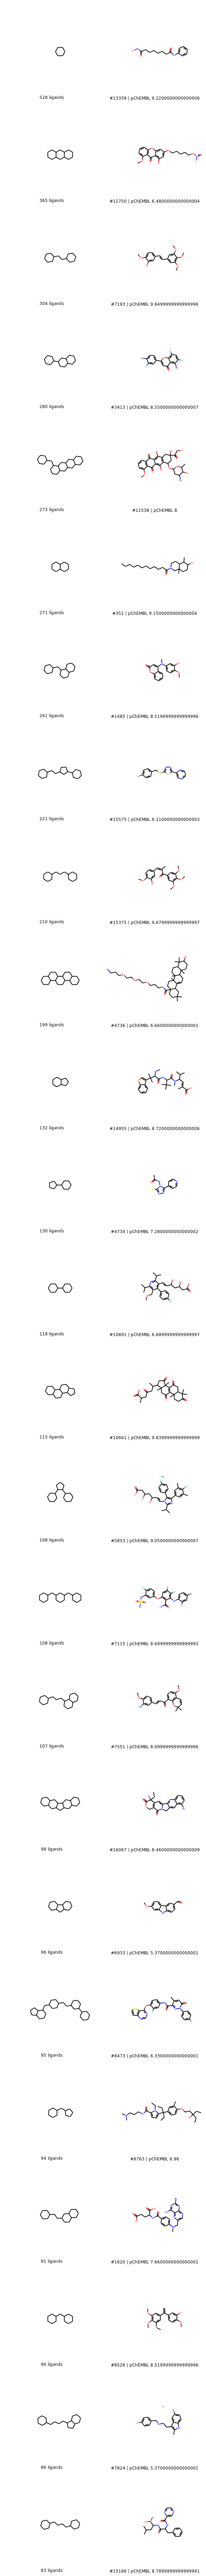

In [24]:
Draw.MolsToGridImage(scaffold_representatives4visualization[:50],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[mol.GetProp('legend')
                              for mol in scaffold_representatives4visualization[:50]])